In [1]:
import tensorflow as tf
from tensorflow.python.framework.ops import disable_eager_execution
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

#disable_eager_execution()

In [24]:
class MyRNN(layers.Layer):
    def __init__(self):
        super(MyRNN, self).__init__()
        self.gru = layers.Bidirectional(layers.GRU(32, return_sequences=True))
        
    def call(self, inputs):
        #sequences, masks = inputs
        sequences, seq_lengths = inputs
        masks = tf.sequence_mask(seq_lengths)
        y = self.gru(sequences, mask=masks)
        
        return y

In [25]:
seq_data = keras.Input(shape=(None, 1),  name="seq_data")
seq_lengths = keras.Input(shape=(), name="seq_lengths", dtype=tf.int32)
#mask = keras.layers.Lambda(lambda x: tf.sequence_mask(x))(seq_lengths)
conv = layers.Conv1D(32, 3, strides=1, padding='same', activation='relu')(seq_data)
#rnn = layers.Bidirectional(layers.GRU(32, return_sequences=True))(conv, mask=mask)
#rnn = MyGRU()((seq_data, mask))
rnn = MyRNN()((conv, seq_lengths))
dense = layers.Dense(5, name="signal_mask")(rnn)
model = keras.Model(inputs=[seq_data, seq_lengths], outputs=[dense])

In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(
            learning_rate=0.001),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
        )

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
seq_data (InputLayer)           [(None, None, 1)]    0                                            
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, None, 32)     128         seq_data[0][0]                   
__________________________________________________________________________________________________
seq_lengths (InputLayer)        [(None,)]            0                                            
__________________________________________________________________________________________________
my_rnn (MyRNN)                  (None, None, 64)     12672       conv1d_4[0][0]                   
                                                                 seq_lengths[0][0]     

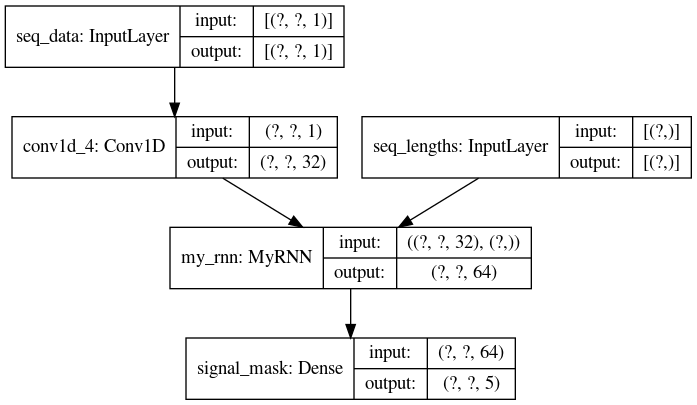

In [27]:
print(model.summary())
dot_img_file = 'model.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [28]:
batch_size = 1
time_step = 100
signal_length = 100
sequences = np.random.rand(batch_size, time_step, 1)
seq_lengths = np.array([signal_length]*batch_size)
signal_mask = np.random.randint(5, size=(batch_size, time_step))

inputs = tf.data.Dataset.from_tensor_slices((sequences, seq_lengths))
signal_masks = tf.data.Dataset.from_tensor_slices(signal_mask)
dataset = tf.data.Dataset.zip((inputs, signal_masks))
dataset = dataset.repeat(100).batch(1)

In [29]:
model.fit(dataset, epochs=10)

Epoch 1/10
100/100 [==============================] - 2s 25ms/step - loss: 1.4480
Epoch 2/10
100/100 [==============================] - 2s 25ms/step - loss: 1.0632
Epoch 3/10
100/100 [==============================] - 3s 25ms/step - loss: 0.6735
Epoch 4/10
100/100 [==============================] - 2s 25ms/step - loss: 0.3263
Epoch 5/10
100/100 [==============================] - 3s 25ms/step - loss: 0.1186
Epoch 6/10
100/100 [==============================] - 2s 25ms/step - loss: 0.0449
Epoch 7/10
100/100 [==============================] - 3s 25ms/step - loss: 0.0236
Epoch 8/10
100/100 [==============================] - 3s 28ms/step - loss: 0.0148
Epoch 9/10
100/100 [==============================] - 3s 25ms/step - loss: 0.0102
Epoch 10/10
100/100 [==============================] - 3s 26ms/step - loss: 0.0075
